<a href="https://colab.research.google.com/github/azamatnarzuloyev/Fribgarlarni_aniqlash/blob/main/Firibgarlarni_aniqlash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Onlayn toʻlovlarda firibgarlikni aniqlash men bu data frameni kagle dan oldim



In [2]:
# kutubxonalarni import qilamiz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# data o'qiymiz 
data = pd.read_csv('Online Payment Fraud Detection.csv',encoding='unicode-escape')

# Ma'lumotlarni tushinish 

In [4]:

data.shape

(30707, 10)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
45878,9,CASH_OUT,107864.89,C663156524,7436.00,0.0,C1839337592,3478300.28,3586165.17,0.0
45879,9,PAYMENT,5266.86,C2016876666,0.00,0.0,M1469270881,0.00,0.00,0.0
45880,9,PAYMENT,32640.97,C619628253,15743.42,0.0,M876706555,0.00,0.00,0.0
45881,9,PAYMENT,15506.86,C1962229953,0.00,0.0,M972080509,0.00,0.00,0.0
45882,9,TRANSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ma'lumotlar to'plami 3 kun: 20 soat ichida sodir bo'lgan tranzaksiyalarni o'z ichiga oladi

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [5]:


data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

No Missing Data

## Relationships and Insights



In [6]:
#Qabul qiluvchi ajralib turishi tekshiramiz 

data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1479336724',
       'M124471510', nan], dtype=object)

In [ ]:

data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [ ]:

data.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

In [7]:
#qancha tranzaksiya olganini tekshirish
data.nameDest.value_counts()

C985934102     71
C1286084959    62
C1590550415    60
C2083562754    60
C977993101     58
               ..
M2120220238     1
M1967442274     1
M1012264852     1
M949085832      1
M124471510      1
Name: nameDest, Length: 18094, dtype: int64

In [ ]:
data.amount.max()

10000000.0

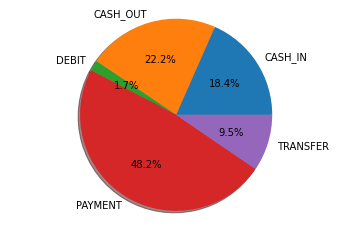

In [8]:
#Amalga oshirilgan operatsiyalar turini taqsimlashni tekshirish

labels = data['type'].astype('category').cat.categories.tolist()
counts = data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

In [10]:
#Bir xil  turdagi operatsiya necha marta amalga oshirilganligini tekshirish. 

data.type.value_counts()

PAYMENT     14790
CASH_OUT     6811
CASH_IN      5647
TRANSFER     2927
DEBIT         532
Name: type, dtype: int64

In [13]:
#Eng yaxshi mijozlarni va ular boshlagan tranzaktsiyalar turini o'rganish
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C672447289     TRANSFER
C203149502     TRANSFER
C2027645838    TRANSFER
C1235600263    TRANSFER
C1583082378    TRANSFER
C1235787497    TRANSFER
C2028160153    TRANSFER
C2028163846    TRANSFER
C649630909     TRANSFER
C1582921957    TRANSFER
Name: type, dtype: object

In [15]:
#O'tkazilgan o'rtacha miqdorni tekshirish
data['amount'].mean()

138297.2659794184

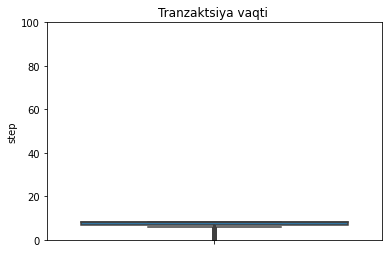

In [16]:
sns.boxplot(y=data.step)
plt.title('Tranzaktsiya vaqti ')
plt.ylim(0,100)
plt.show()

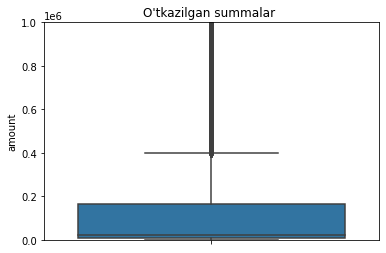

In [11]:
sns.boxplot(y=data.amount)
plt.title("O'tkazilgan summalar ")
plt.ylim(0,1000000)
plt.show()

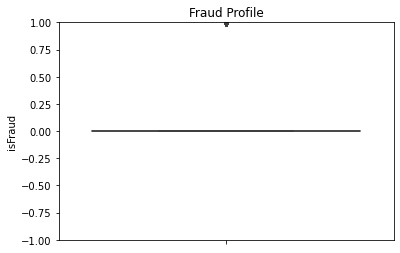

In [19]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

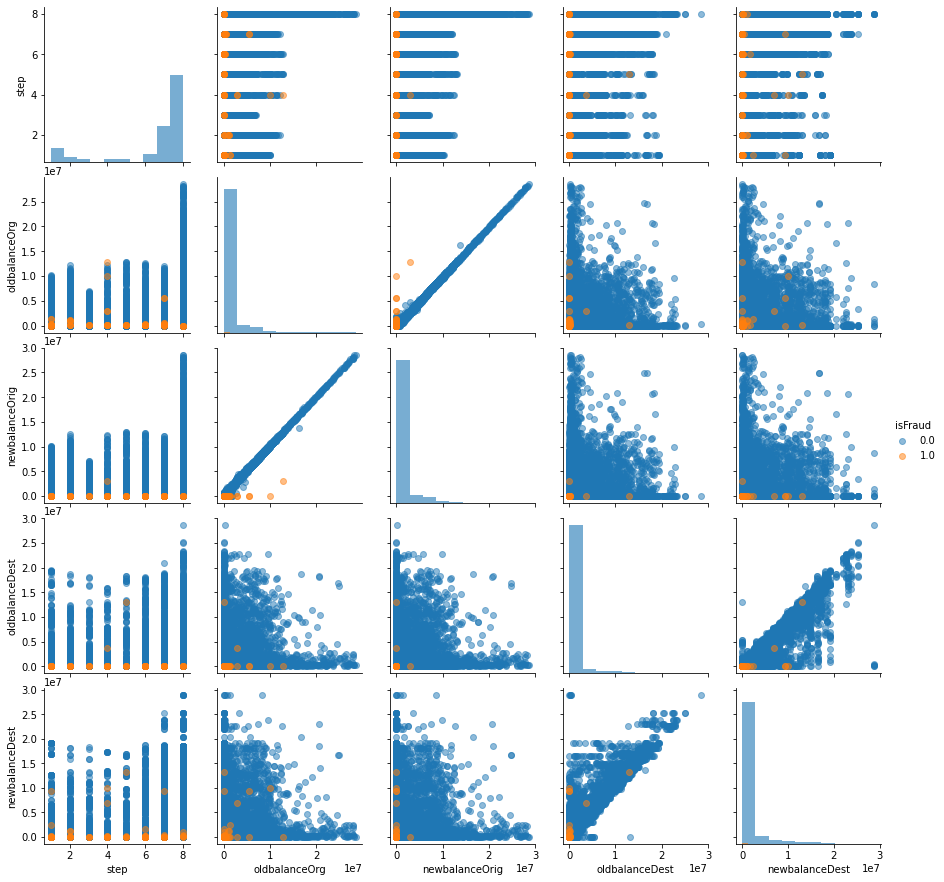

In [20]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

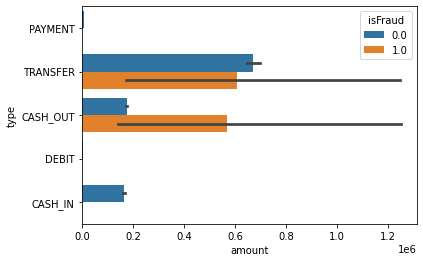

In [21]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

(0.0, 2000000.0)

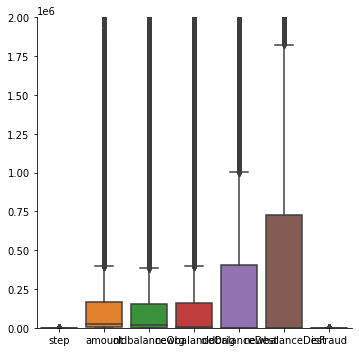

In [22]:

sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)

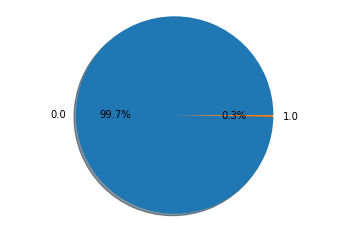

In [23]:


labels = data['isFraud'].astype('category').cat.categories.tolist()
counts = data['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

In [24]:
# Firibgar tranzaksiyani firibgarlikdan ajratish

Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [25]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))
   

Fraudulent Transaction: 84
Not Fraudulent Transaction: 30622


Ma'lumotlar to'plami og'irligini ko'rsatadi 'Class-imbalance'

In [27]:
#Firibgar bo'lmagan operatsiyalarning statistik mohiyatini tushunish.

Not_Fraudulent_Transaction.amount.describe()

count    3.062200e+04
mean     1.370667e+05
std      2.884325e+05
min      1.770000e+00
25%      6.142740e+03
50%      2.128877e+04
75%      1.632656e+05
max      5.677662e+06
Name: amount, dtype: float64

In [28]:
#Firibgarlik operatsiyalarining statistik mohiyatini tushunish.

Fraudulent_Transaction.amount.describe()

count    8.400000e+01
mean     5.884468e+05
std      1.761343e+06
min      1.640000e+02
25%      1.370711e+04
50%      2.637218e+04
75%      2.164220e+05
max      1.000000e+07
Name: amount, dtype: float64

In [29]:
#Har ikki toifadagi operatsiyalarni solishtirish
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0.0,6.631115,137066.652791,860197.721701,878094.418009,869332.794836,1.194580e+06
1.0,4.500000,588446.793095,601493.379286,34885.933810,208636.541905,6.973851e+05


# Undersampling
 

Firibgar bo'lmagan tranzaksiyalar va firibgarlik tranzaksiyalarining o'xshash taqsimotini o'z ichiga olgan namunaviy ma'lumotlar to'plamini yaratish. Bu sinfdagi nomutanosiblikni tuzatadi va bizning mashinani o'rganish modelimizga yaxshiroq bashorat qilishga yordam beradi.

Biz firibgarlikni aniqlaydigan modelni yaratmoqchi bo'lganimiz sababli, biz namuna olishimizda asl ma'lumotlar to'plamimizdagi firibgarlik deb tasniflangan tranzaktsiyalar soniga asoslanamiz.

Firibgarlik operatsiyalari: 1142

In [30]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

Ikki dataframeni birlashtirish

In [32]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [33]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
23092,8,CASH_IN,281736.24,C1549259051,3040331.98,3322068.22,C1107146140,1049310.94,1655416.88,0.0
16629,8,TRANSFER,614556.68,C1083749100,526.00,0.00,C732929122,14495.00,2221293.55,0.0
8583,7,CASH_IN,32512.41,C1936634530,4125948.97,4158461.38,C811597470,60237.85,428593.84,0.0
15223,8,PAYMENT,11452.68,C1755444189,49896.93,38444.25,M1096552547,0.00,0.00,0.0
17755,8,CASH_OUT,418626.26,C1514094950,40405.61,0.00,C1383454473,0.00,1173901.80,0.0


In [34]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
18771,8,TRANSFER,222.00,C1961506277,222.00,0.0,C378841819,0.00,267095.19,1.0
18772,8,CASH_OUT,222.00,C1737727444,222.00,0.0,C588779235,24708.00,171647.35,1.0
24966,8,TRANSFER,1996.17,C1198040187,1996.17,0.0,C1828047633,0.00,0.00,1.0
24967,8,CASH_OUT,1996.17,C858959216,1996.17,0.0,C864078397,2559.74,4555.92,1.0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.0,C277510102,0.00,970749.68,1.0


In [35]:
new_dataset['isFraud'].value_counts()

0.0    1142
1.0      84
Name: isFraud, dtype: int64

In [36]:
new_dataset.shape

(1226, 10)

In [38]:

new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0.0,6.525394,145977.173651,874338.834790,894142.660989,867847.890622,1.137986e+06
1.0,4.500000,588446.793095,601493.379286,34885.933810,208636.541905,6.973851e+05


# Feature Engineering

ML modelimizni o'rgatish va sinab ko'rish uchun biz ma'lumotlar majmuamizdan xususiyatlarni (ustunlarni) tanlaymiz
Chunki bizning ma'lumotlar to'plamimiz toifali qiymatlarni o'z ichiga oladi ('nameOrig', 'nameDest'). ularni osonlikcha ishlatish mumkin bo'lgan ikkilik formatga yoki Machine Learning modeliga aylantirish zarur bo'ladi.

Bu bitta issiq kodlash orqali amalga oshiriladi.

In [39]:
# One-hot Encoding.
#Importing library

from sklearn.preprocessing import OneHotEncoder

In [40]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)

In [41]:
#perform one-hot encoding on 'type' column 
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [42]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M977650730,nameDest_M979425573,nameDest_M981018779,nameDest_M984618448,nameDest_M989992548,nameDest_M996509179,nameDest_M997919131,nameDest_M998703767,nameDest_M999221400,nameDest_M999797422
23092,8,281736.24,3040331.98,3322068.22,1049310.94,1655416.88,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16629,8,614556.68,526.00,0.00,14495.00,2221293.55,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8583,7,32512.41,4125948.97,4158461.38,60237.85,428593.84,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15223,8,11452.68,49896.93,38444.25,0.00,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17755,8,418626.26,40405.61,0.00,0.00,1173901.80,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,8,222.00,222.00,0.00,0.00,267095.19,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,8,222.00,222.00,0.00,24708.00,171647.35,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24966,8,1996.17,1996.17,0.00,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24967,8,1996.17,1996.17,0.00,2559.74,4555.92,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
encoder_df.shape

(1226, 2329)

In [44]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M977650730,nameDest_M979425573,nameDest_M981018779,nameDest_M984618448,nameDest_M989992548,nameDest_M996509179,nameDest_M997919131,nameDest_M998703767,nameDest_M999221400,nameDest_M999797422
23092,8,281736.24,3040331.98,3322068.22,1049310.94,1655416.88,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16629,8,614556.68,526.00,0.00,14495.00,2221293.55,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8583,7,32512.41,4125948.97,4158461.38,60237.85,428593.84,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15223,8,11452.68,49896.93,38444.25,0.00,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17755,8,418626.26,40405.61,0.00,0.00,1173901.80,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M977650730,nameDest_M979425573,nameDest_M981018779,nameDest_M984618448,nameDest_M989992548,nameDest_M996509179,nameDest_M997919131,nameDest_M998703767,nameDest_M999221400,nameDest_M999797422
18771,8,222.00,222.00,0.0,0.00,267095.19,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18772,8,222.00,222.00,0.0,24708.00,171647.35,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24966,8,1996.17,1996.17,0.0,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24967,8,1996.17,1996.17,0.0,2559.74,4555.92,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25875,8,1078013.76,0.00,0.0,0.00,970749.68,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Target, Feature Split

Target Selection


'isFraud' Ustunni tanlash (Y)

In [46]:
Y = encoder_df['isFraud']

In [47]:
features = encoder_df.drop('isFraud', axis=1)

In [48]:

X = features

In [49]:
Y.head()

23092    0.0
16629    0.0
8583     0.0
15223    0.0
17755    0.0
Name: isFraud, dtype: float64

In [50]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M977650730,nameDest_M979425573,nameDest_M981018779,nameDest_M984618448,nameDest_M989992548,nameDest_M996509179,nameDest_M997919131,nameDest_M998703767,nameDest_M999221400,nameDest_M999797422
23092,8,281736.24,3040331.98,3322068.22,1049310.94,1655416.88,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16629,8,614556.68,526.00,0.00,14495.00,2221293.55,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8583,7,32512.41,4125948.97,4158461.38,60237.85,428593.84,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15223,8,11452.68,49896.93,38444.25,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17755,8,418626.26,40405.61,0.00,0.00,1173901.80,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
#malumotlarni train va test setlarga ajratish 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030484    67  106460.7      106460.70             0.0      1414263.15   
257895     14   14487.7        7038.86             0.0            0.00   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030484      1520723.84             0              1           0   
257895             0.00             0              0           0   

         type_PAYMENT  ...  nameDest_M937351412  nameDest_M941819956  \
1030484             0  ...                    0                    0   
257895              1  ...                    0                    0   

         nameDest_M944740216  nameDest_M955685432  nameDest_M960127682  \
1030484                    0                    0                    0   
257895                     0                    0                    0   

         nameDest_M960655646  nameDest_M966017907  nameDest_M973092639  \
1030484                    0                    0       

# Training our Classification Model with a Logistic Regression Classifier

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:

model.fit(X_train, Y_train)

LogisticRegression()

In [56]:


model_pred = model.predict(X_test)

In [57]:

probs = model.predict_proba(X_test)

## Logistic Regression Model Evaluation

In [58]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [59]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       229
         1.0       0.68      0.76      0.72        17

    accuracy                           0.96       246
   macro avg       0.83      0.87      0.85       246
weighted avg       0.96      0.96      0.96       246



In [60]:

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),223,6
Actually Positive(1),4,13


In [61]:

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),223,6
Actually Fraud(1),4,13


In [62]:

print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.959349593495935


Bizning logistik regressiya modeli 93% aniqlikni bildiradi

In [63]:

average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.539479976843112

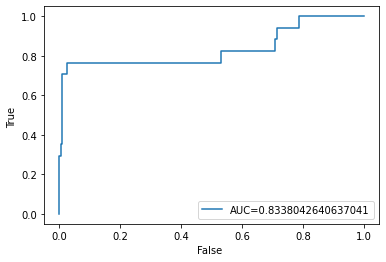

In [64]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True ')
plt.xlabel('False ')
plt.legend(loc=4)
plt.show()

In [ ]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9627671799586301



Biz bunda 97% aniqlikda ishlayapti madelimiz 

## Training with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

model = RandomForestClassifier(random_state=5, n_estimators=20)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [ ]:
model_pred = model.predict(X_test)

In [ ]:

probs = model.predict_proba(X_test)

##  Random Forest Model Evaluation

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [ ]:

print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.98      0.95      0.97       228

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



In [ ]:

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),225,4
Actually Positive(1),11,217


In [ ]:

pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),224,5
Actually Fraud(1),10,218


In [ ]:

print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9671772428884027


Our Random Forest Model indicates 93% accuracy

In [ ]:

average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9585980841188785

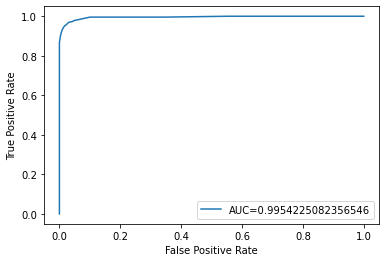

In [ ]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9931241860108788


<h1>0,99 AUC ball bizning Tasodifiy o'rmon modelimiz 99% to'g'ri bashorat bilan deyarli mukammal ekanligini ko'rsatadi</h1>.